ModSim Project 2

In [1]:
%matplotlib inline

from modsim import *

In [11]:
init = State(BAC=0)
person = System(init = init, t0=0, t_end=12*60, 
                gender = .73, 
                weight = 150, 
                drink = 12.5,
                percent = .05, drinking_time = 0.5*60, dt = 1*60)
#time in hours
# dt is time step
#1 drink =.6oz

In [12]:
def run_simulation(state, system):
    unpack(system)
    #alc = drink*percent
    alc = 10*.6
    
    frame = TimeFrame(columns = init.index)
    frame.loc[t0] = init
    ts = linrange(t0, t_end-dt, dt)
    
    BAC = state.BAC

    
    for t in ts:
        
        if t < drinking_time:
            #drinking phase
            BAC += ((alc/(gender*weight*(drinking_time/60)))-((.2*BAC)/(BAC+1))) *(dt)
            frame.loc[t+dt] = BAC

            
        else:
            #recovery phase
            BAC += (-((.2*BAC)/(BAC+1))) * (dt)
            frame.loc[t+dt] = BAC

            
        system.results = frame
        """
    for t in ts:
        
        #drinking phase
        BAC += ((alc/(gender*weight*(drinking_time)))-((.2*BAC)/(BAC+1))) *(dt)
            
        frame.loc[t+dt] = BAC

"""
            
    
    


In [13]:
run_simulation(init, person)
person.results.BAC

0        0.000000
60       6.575342
120     -3.840571
180    -20.065074
240    -32.694497
300    -45.073112
360    -57.345387
420    -69.558359
480    -81.733392
540    -93.882029
600   -106.011226
660   -118.125499
720   -130.227953
Name: BAC, dtype: float64

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


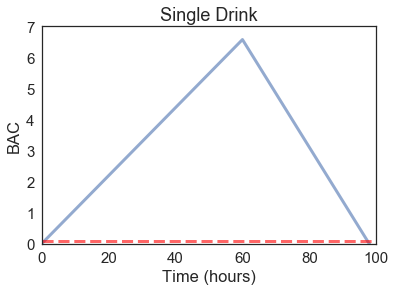

In [21]:
newfig()
plot(person.results.BAC)
plot([t0, t_end], [0.08, 0.08], 'r--')
decorate(title = 'Single Drink', xlabel='Time (hours)',
         ylabel='BAC', xlim = [0, 100], ylim=[0, 7])

In [6]:
#help(decorate)

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes = Axes(0.125,0.125;0.775x0.755)
    axes_locator = None
    axis_bgcolor = (1.0, 1.0, 1.0, 1.0)
    axisbelow = True
    children = [<matplotlib.spines.Spine object at 0x00000256AE9B...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    cursor_props = (1, (0.0, 0.0, 0.0, 1))
    data_ratio = 1.0
    default_bbox_extra_artists = [<matplotlib.spines.Spine object at 0x00000256AE9B...
    facecolor = (1.0, 1.0, 1.0, 1.0)
    fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(432x288)
    frame_on = True
    geometry = (1, 1, 1)
    gid = None
    images = <a list of 0 AxesImage objects>
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 0 Line2D objects>
    navigate = True
    navigate_mode = None
    path_effects = []
    picke

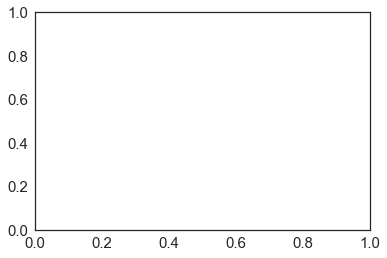

In [16]:
plt.getp(plt.gca())

In [8]:
def run_simulation_sweep(state, system, alc):
    unpack(system)
    #alc = drink*percent
    alc = alc
    
    frame = TimeFrame(columns = init.index)
    frame.loc[t0] = init
    ts = linrange(t0, t_end-dt, dt)
    
    BAC = state.BAC

    
    for t in ts:
        
        if t < drinking_time:
            #drinking phase
            BAC += ((alc/(gender*weight*(drinking_time)))-((.2*BAC)/(BAC+1))) *(dt)
            frame.loc[t+dt] = BAC

            
        else:
            #recovery phase
            BAC += (-((.2*BAC)/(BAC+1))) * (dt)
            frame.loc[t+dt] = BAC

            
        system.results = frame


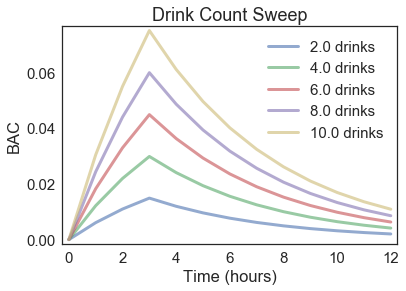

In [9]:
BAC_array = linrange(2,10,2)
newfig()

for BAC in BAC_array:
    run_simulation_sweep(init, person, BAC)
    plot(person.results.BAC, label= str(BAC) + ' drinks')
    decorate(title = 'Drink Count Sweep', xlabel='Time (hours)',
         ylabel='BAC')


In [10]:
#bac highly dependent on drinking_time, move around to get accurate 'drinks' to BAC value
#use smaller time step for more accurate results